In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
%matplotlib inline

In [7]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [8]:
X.shape

(1000, 2)

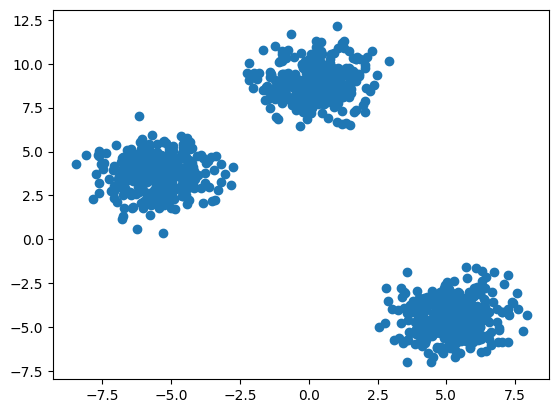

In [9]:
plt.scatter(X[:,0],X[:,1])

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_train=train_test_split(X,y,test_size=0.33,random_state=42)

In [12]:
from sklearn.cluster import KMeans

In [16]:
#manual (elbow method)

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

In [17]:
wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1140.4677884655127,
 1097.4518366982998,
 856.4804185864402,
 767.9899447322797,
 679.9911987635916,
 603.5605067840631,
 546.2503976215164]

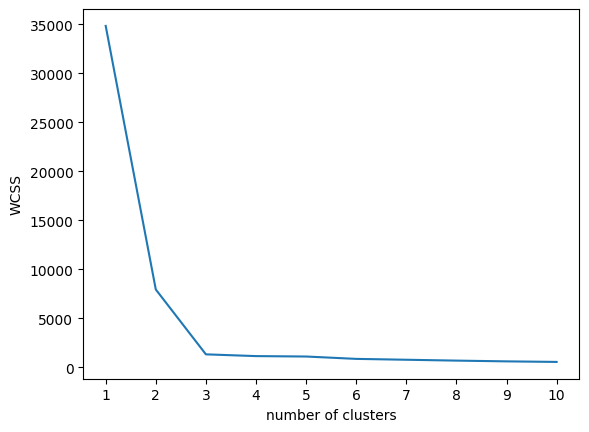

In [18]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [19]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [20]:
y_labels=kmeans.fit_predict(x_train)

In [24]:
y_test_labels=kmeans.predict(x_test)

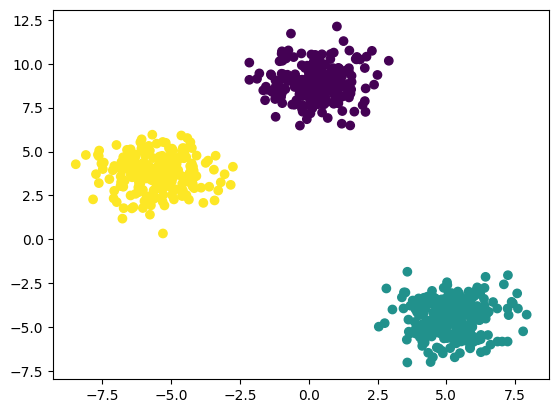

In [22]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_labels)

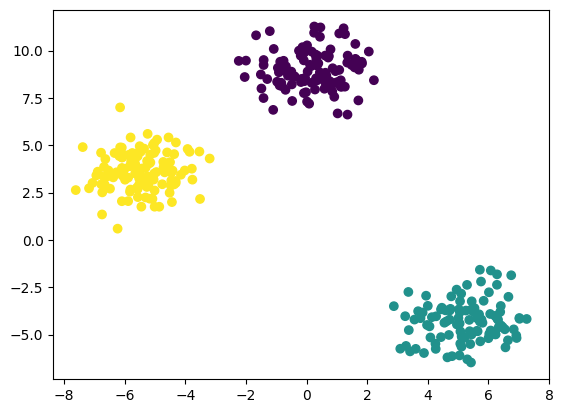

In [25]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test_labels)

In [26]:
#automate k finder...

from kneed import KneeLocator

In [27]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [28]:
#performance matrix
from sklearn.metrics import silhouette_score

In [30]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [31]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4806050548653587,
 0.4764159752211399,
 0.45918398210575384,
 0.34568939413246125,
 0.3255730625774517,
 0.33913476546824267]

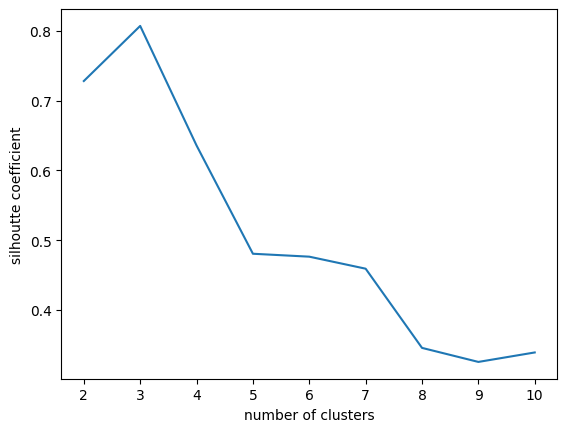

In [32]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("number of clusters")
plt.ylabel("silhoutte coefficient")
plt.show()

In [ ]:
#so k=3 is the perfect answer....